In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [6]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(4,4), input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024, activation = 'relu'))
cnn.add(Dense(10, activation='softmax'))

In [7]:
cnn.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 1024)              12846080  
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 12857418 (49.05 MB)
Trainable params: 12857418 (49.05 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [9]:
history_cnn = cnn.fit(X_train,y_train,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 18s 7ms/step - loss: 0.4278 - accuracy: 0.8844 - val_loss: 0.2087 - val_accuracy: 0.9390
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1843 - accuracy: 0.9457 - val_loss: 0.1436 - val_accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1323 - accuracy: 0.9608 - val_loss: 0.1114 - val_accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1050 - accuracy: 0.9692 - val_loss: 0.0935 - val_accuracy: 0.9702
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0865 - accuracy: 0.9744 - val_loss: 0.0867 - val_accuracy: 0.9723
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0743 - accuracy: 0.9778 - val_loss: 0.0671 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0642 - accuracy: 0.9809 - val_loss: 0.0671 - val_ac

In [13]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


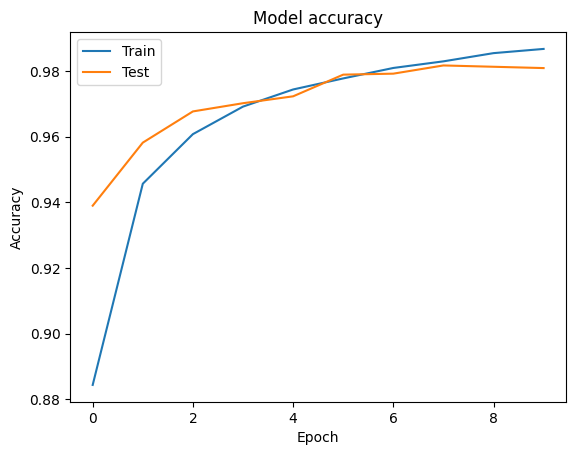

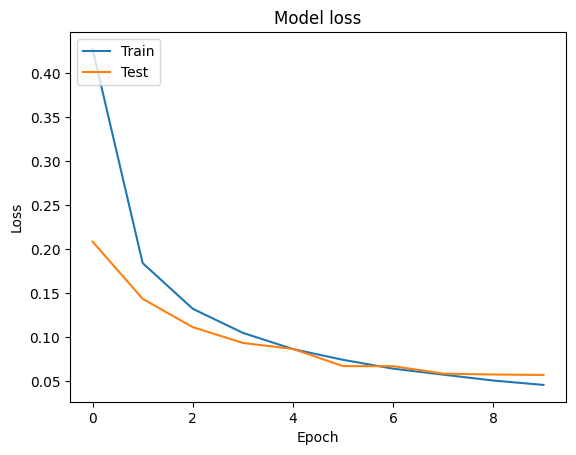

In [15]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_loss_accuracy(history_cnn)

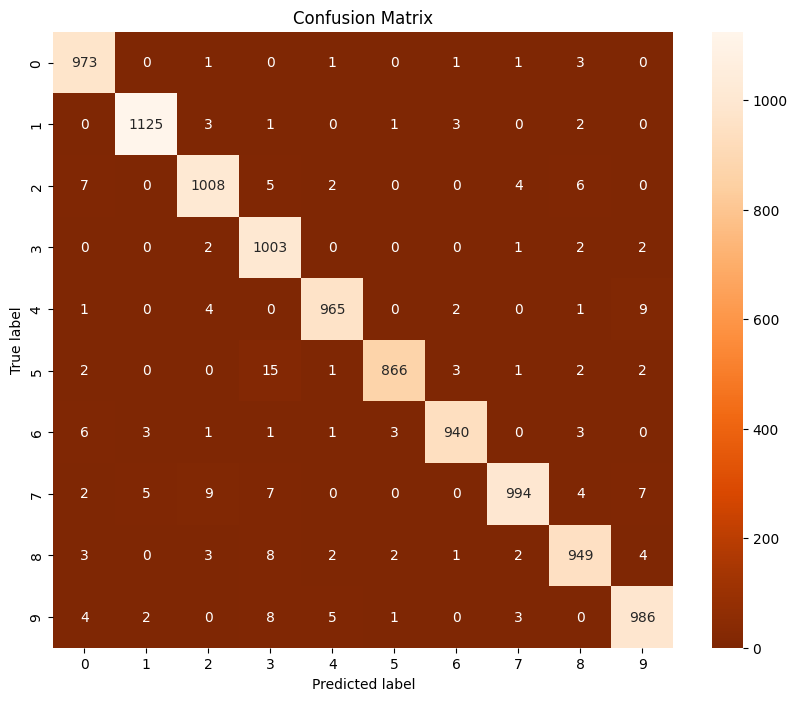

In [21]:
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to class integers if they are not already
test_labels_integers = np.argmax(y_test, axis=1)

# Compute confusion matrix using integer labels
cm = confusion_matrix(test_labels_integers, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges_r", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()